# Python 範例

In [0]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/JPY')

In [0]:
df = dfs[0]

In [0]:
df = df.iloc[:,0:6]

In [0]:
df.columns = ['掛牌日期','幣別', '現金-買入','現金-賣出','即期-買入','即期-賣出']

In [0]:
df['掛牌日期'] = pandas.to_datetime(df['掛牌日期'], format = '%Y/%m/%d')
df.set_index('掛牌日期', inplace=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_te

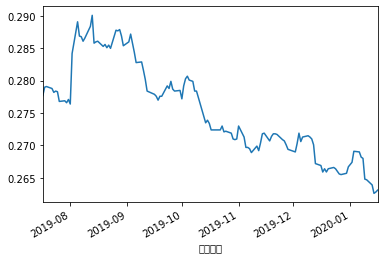

In [13]:
df['現金-買入'].plot()

In [0]:
df['sma7']  =  df['現金-買入'].rolling(window = 7).mean()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_te

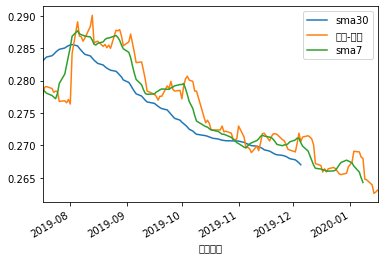

In [17]:
df[['sma30','現金-買入', 'sma7']].plot()

## 網路爬蟲

In [23]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res.text

'<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html lang="zh-TW" class="ie6 ielt8"> <![endif]-->\n<!--[if IE 7 ]>    <html lang="zh-TW" class="ie7 ielt8"> <![endif]-->\n<!--[if IE 8 ]>    <html lang="zh-TW" class="ie8"> <![endif]-->\n<!--[if (gte IE 9)|!(IE)]><!--> <html lang="zh-TW"> <!--<![endif]-->\n<head>\n    <!-- Google Tag Manager For AppledailyTW_PRD-->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'//www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-W8R48TQ\');</script>\n<!-- End Google Tag Manager -->  <meta charset="utf-8" />\n  <title>即時｜最新｜蘋果新聞網｜蘋果日報</title>\n  <meta name="msvalidate.01" content="D53E6F2134B58B29A9ADF486F8B90042" />\n  <meta name="description" content="提供國內外最新重大事件、娛樂名人、熱門話題等新聞內容..." />\n  <meta name="keywords" con

In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [25]:
for rec in soup.select('.rtddt a'):
  dt = rec.select_one('time').text
  h2 = rec.select_one('h2').text
  h1 = rec.select_one('h1').text
  print(dt, h2, h1)

11:53 地產 七期豪宅競逐一哥　寶輝秋虹谷8字頭再售2...
11:53 財經 【兄弟鬩牆3】掌握張榮發基金會　幾乎可掌...
11:51 娛樂 爽樂團主唱推《麻將哥》　天橋開戰打到溪谷
11:50 論壇 翁達瑞 ：蕭美琴敗選，別怪花蓮選民，他們...
11:48 國際 殘忍惡作劇！豬被從高空重摔　掉落富豪家泳...
11:47 政治 沈富雄列選後3重點　「我將全力助國民黨起...
11:46 財經 冰島風暴重演？港元大空頭發話　香港銀行危...
11:45 政治 蔡英文「中共武力犯台將付極大代價」　 蔡...
11:43 財經 美中貿易戰左右PCB廠布局　去年回台投資...
11:40 財經 ​新款遊戲機年底上市　掀起記憶體搶貨潮
11:40 體育 台灣小將澳網初登場　吳東霖、梁恩碩力戰3...
11:40 生活 無薪假人數大減69%　1月中僅941人
11:37 社會 人妻與小王鹹濕簡訊還上摩鐵　無法證明有性...
11:34 社會 維冠大樓5建商被災民求償　法官准了！判賠...
11:34 體育 【澳網】會外第3天空污指數降低　台灣2新...
11:32 政治 想黃國昌當民眾黨副主席　蔡壁如改口：不要...
11:29 財經 【兄弟鬩牆2】蔡玉真爆：鍾德美原是張國明...
11:26 社會 煮食忘了關瓦斯　宜蘭2民宅付之一炬
11:22 生活 注射一氧化氮讓癌細胞「改邪歸正」　清大研...
11:20 生活 抗議「熊貓」片面改勞動條件　台中場集結8...
11:11 財經 展望今年景氣　台銀董座：「緩步前行」到「...
11:10 政治 謝金河指韓國瑜「沒喝睡不著」　韓辦凌晨發...
11:09 財經 具多項優勢　瑞軒預期MiniLED普及速...
11:05 生活 「柯P已成他不屑的舊政治人物」　陳嘉行千...
11:05 生活 美伊緊繃情勢稍紓解油價跌　下周汽、柴油估...
11:03 娛樂 郭碧婷合體婆婆慶生　蛋糕「多一隻老鼠」藏...
11:03 論壇 陳進茂：精神疾患重回社會，需要支持、接納...
11:02 體育 【NBA】菜鳥能恩轟33分　熱火拔馬刺升...
10:58 生活 北市歲末公安檢查4家不合格　貴婦百貨、S...
10:55 財經 半導體去年營收下滑11.9% 　英特爾重...


In [0]:
ary = []
for rec in soup.select('.rtddt a'):
  dt = rec.select_one('time').text
  h2 = rec.select_one('h2').text
  h1 = rec.select_one('h1').text
  ary.append({'time':dt, 'category':h2, 'title':h1})

In [0]:
import pandas
df = pandas.DataFrame(ary)

In [28]:
df

,time,category,title
0,11:53,地產,七期豪宅競逐一哥 寶輝秋虹谷8字頭再售2...
1,11:53,財經,【兄弟鬩牆3】掌握張榮發基金會 幾乎可掌...
2,11:51,娛樂,爽樂團主唱推《麻將哥》 天橋開戰打到溪谷
3,11:50,論壇,翁達瑞 ：蕭美琴敗選，別怪花蓮選民，他們...
4,11:48,國際,殘忍惡作劇！豬被從高空重摔 掉落富豪家泳...
5,11:47,政治,沈富雄列選後3重點 「我將全力助國民黨起...
6,11:46,財經,冰島風暴重演？港元大空頭發話 香港銀行危...
7,11:45,政治,蔡英文「中共武力犯台將付極大代價」 蔡...
8,11:43,財經,美中貿易戰左右PCB廠布局 去年回台投資...
9,11:40,財經,​新款遊戲機年底上市 掀起記憶體搶貨潮


In [0]:
import sqlite3 as lite
with lite.connect('test.sqlite') as con:
  df.to_sql('news', con = con )

In [31]:
with lite.connect('test.sqlite') as con:
  df2 = pandas.read_sql_query("select * from news where category = '娛樂'", con = con )
df2

,index,time,category,title
0,2,11:51,娛樂,爽樂團主唱推《麻將哥》 天橋開戰打到溪谷
1,25,11:03,娛樂,郭碧婷合體婆婆慶生 蛋糕「多一隻老鼠」藏...
